# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num``` (a 14ª variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [17]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0   

In [18]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [19]:
# Para montar a bivariada, considerei que o valor de 0 como uma pessoa que possui um diagnóstico de não possuir doença cardiaca.
# Número de 'saudáveis' (num igual a 0)
num_saudaveis = df[df['num'] == 0]['num'].count()

# Número de 'doentes' (num maior que 0)
num_doentes = df[df['num'] > 0]['num'].count()

# Total
total = len(df)

# Quantidade média de doentes
proporcao_doentes = num_doentes / total

# Odds
odds = num_doentes / num_saudaveis

# Odds ratio (com o total como referência)
odds_esperado_sex = (num_doentes / total) / (num_saudaveis / total)

# LOG(Odds)
log_odds = np.log(odds)

# Weight of Evidence (WOE)
woe = np.log(odds / odds_esperado_sex)

# Para facilitar a visualização dos resultados obtidos, montei os resutados em um DataFrame
labels_bivariada_sexo = ['Número de saudáveis', 'Número de doentes', 'Total', 'Quantidade média de doentes', 'Odds', 'Odds ratio', 'Logito', 'Weight of Evidence (WOE)']
bivariada_sexo = pd.DataFrame({
    'Número de saudáveis': num_saudaveis,
    'Número de doentes': num_doentes,
    'Total': total,
    'Quantidade média de doentes': proporcao_doentes,
    'Odds': odds,
    'Odds ratio': odds_esperado_sex,
    'Logito': log_odds,
    'Weight of Evidence (WOE)': woe
}, index= labels_bivariada_sexo)

print(bivariada_sexo)

                             Número de saudáveis  Número de doentes  Total  \
Número de saudáveis                          164                139    303   
Número de doentes                            164                139    303   
Total                                        164                139    303   
Quantidade média de doentes                  164                139    303   
Odds                                         164                139    303   
Odds ratio                                   164                139    303   
Logito                                       164                139    303   
Weight of Evidence (WOE)                     164                139    303   

                             Quantidade média de doentes      Odds  \
Número de saudáveis                             0.458746  0.847561   
Número de doentes                               0.458746  0.847561   
Total                                           0.458746  0.847561   
Quantidade média 

2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [23]:
# Para realizar a categorização da variável em 5 grupos, irei arbritariamente dividir de 20 anos em 20 anos e no ultimo grupo incluir pessoas que por acaso tenham até 120 anos.
# Categorização da variável 'age'
bins = [20, 40, 60, 80, 100, 120]
labels_age = ['20-39', '40-59', '60-79', '80-99', '100-120']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels_age)

# Cálculo do número de observações em cada grupo
num_observacoes_age = df['age_group'].value_counts().sort_index()

# Cálculo do número de 'saudáveis' (num igual a 0) e 'doentes' (num maior que 0) em cada grupo
num_saudaveis_age = df[df['num'] == 0]['age_group'].value_counts().sort_index()
num_doentes_age = df[df['num'] > 0]['age_group'].value_counts().sort_index()

# Cálculo do total de observações em cada grupo
total_age = num_observacoes_age.sum()

# Cálculo da quantidade média de doentes em cada grupo
proporcao_doentes_age = num_doentes_age / num_observacoes_age

# Cálculo do odds em cada grupo
odds_age = num_doentes_age / num_saudaveis_age

# Cálculo do odds ratio (com o total como referência) em cada grupo
odds_esperado_age = (num_doentes_age.sum() / total_age) / (num_saudaveis_age.sum() / total_age)
odds_ratio_age = odds_age / odds_esperado_age

# Cálculo do LOG(Odds) em cada grupo
log_odds_age = np.log(odds_age)

# Cálculo do Weight of Evidence (WOE) em cada grupo
woe_age = np.log(odds_age / odds_esperado_age)

# Cálculo do valor médio da variável 'age' em cada grupo
media_age_age = df.groupby('age_group')['age'].mean().sort_index()

# Combine todas as informações em um DataFrame para análise
bivariada_age = pd.DataFrame({
    'Num Observações': num_observacoes_age,
    'Num Saudáveis': num_saudaveis_age,
    'Num Doentes': num_doentes_age,
    'Total': total_age,
    'Proporção Doentes': proporcao_doentes_age,
    'Odds': odds_age,
    'Odds Ratio': odds_ratio_age,
    'LOG(Odds)': log_odds_age,
    'WOE': woe_age,
    'Média Idade': media_age_age
}, index=labels_age)

print(bivariada_age)

         Num Observações  Num Saudáveis  Num Doentes  Total  \
20-39                 18             12            6    303   
40-59                206            117           89    303   
60-79                 79             35           44    303   
80-99                  0              0            0    303   
100-120                0              0            0    303   

         Proporção Doentes      Odds  Odds Ratio  LOG(Odds)       WOE  \
20-39             0.333333  0.500000    0.589928  -0.693147 -0.527755   
40-59             0.432039  0.760684    0.897497  -0.273538 -0.108145   
60-79             0.556962  1.257143    1.483248   0.228842  0.394234   
80-99                  NaN       NaN         NaN        NaN       NaN   
100-120                NaN       NaN         NaN        NaN       NaN   

         Média Idade  
20-39      36.833333  
40-59      51.800971  
60-79      65.329114  
80-99            NaN  
100-120          NaN  


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

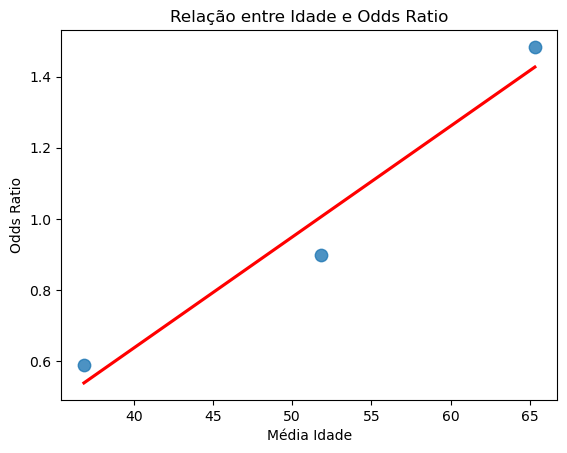

In [35]:
# Gráfico de Dispersão com uma linha de regressão
sns.regplot(x='Média Idade', y='Odds Ratio', data=bivariada_age, ci=None, scatter_kws={"s": 80}, line_kws={"color": "red"})

# Defina rótulos para os eixos
plt.xlabel('Média Idade')
plt.ylabel('Odds Ratio')

# Exiba o gráfico
plt.title('Relação entre Idade e Odds Ratio')
plt.show()